# **Disciplina:** CAT205 - Instrumentos Meteorológicos e Métodos de Observação


---
## **Aula Prática:** Trabalhando com Dados de Estações Pluviométricas

---


**OBJETIVO:** Nesta aula prática aprenderemos como baixar e plotar gráficos dos dados das **Estações Meteorológicas de Superfície (EMS)** do [**Centro Nacional de Monitoramento e Alertas de Desastres Naturais (CEMADEN)**](https://www.gov.br/cemaden/pt-br).

---


**DADOS DE ENTRADA**: Arquivo *Comma-separated values (CSV)* da estação pluviométrica da cidade de Lageado (RS). O acesso aos dados é realizado através do site do CEMADEN: *https://mapainterativo.cemaden.gov.br/#*

- **Tipo do dado:** tabela  
- **Formato do dado:** arquivo CSV
- **Nome do arquivo:** data.csv
- **Fonte dos dados:** CEMADEN


---

**DADOS DE SAÍDA:** Serão geradas figuras
- **Tipo do dado:** Figuras
- **Formato do dado:** PNG
- **Imagens geradas:**
    1. Figura_1_mapa_localizacao_da_estacao.png
    2. Figura_2_precipitacao_por_dia.png
    3. Figura_3_precipitacao_por_hora.png




---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:

1.   Instalação das bibliotecas
2.   Importação das biblotecas
3.   Baixando os dados das estações do CEMADEN
4.   Conhecendo os dados da estação pluviométrica
5.   Mapa com a localização da estação pluviométrica
6.   Gráfico da quantidade de precipitação por dia
7.   Gráfico da quantidade de precipitação por hora


---



**OBSERVAÇÕES IMPORTANTES**:
1. Para essa aula utilizaremos o Google Drive. Ele pode ser acessado através do e-mail da Unifei ou pelo gmail pessoal de vocês.
2. Assistir o material pré-aula que explica o que é o Google Colab, basta clicar [aqui](https://drive.google.com/file/d/1yBoph8aoyWbx-oWGA_bNA6d93zT18qRU/view?usp=sharing). O código utilizado esta [aqui](https://drive.google.com/file/d/10aXWHwbBAZd1qyQTTXu-9MxQ2tMctsFX/view?usp=sharing).
2. Vocês não precisam ter conhecimento em programação. Faremos passo-a-passo as etapas desse código.


---


- **Realizado por:** Enrique V. Mattos - 08/08/2024
- **Atualizado por:** Enrique V. Mattos - 30/09/2024

---

**Exemplo 1:** Mapa da localização da estação pluviométrica

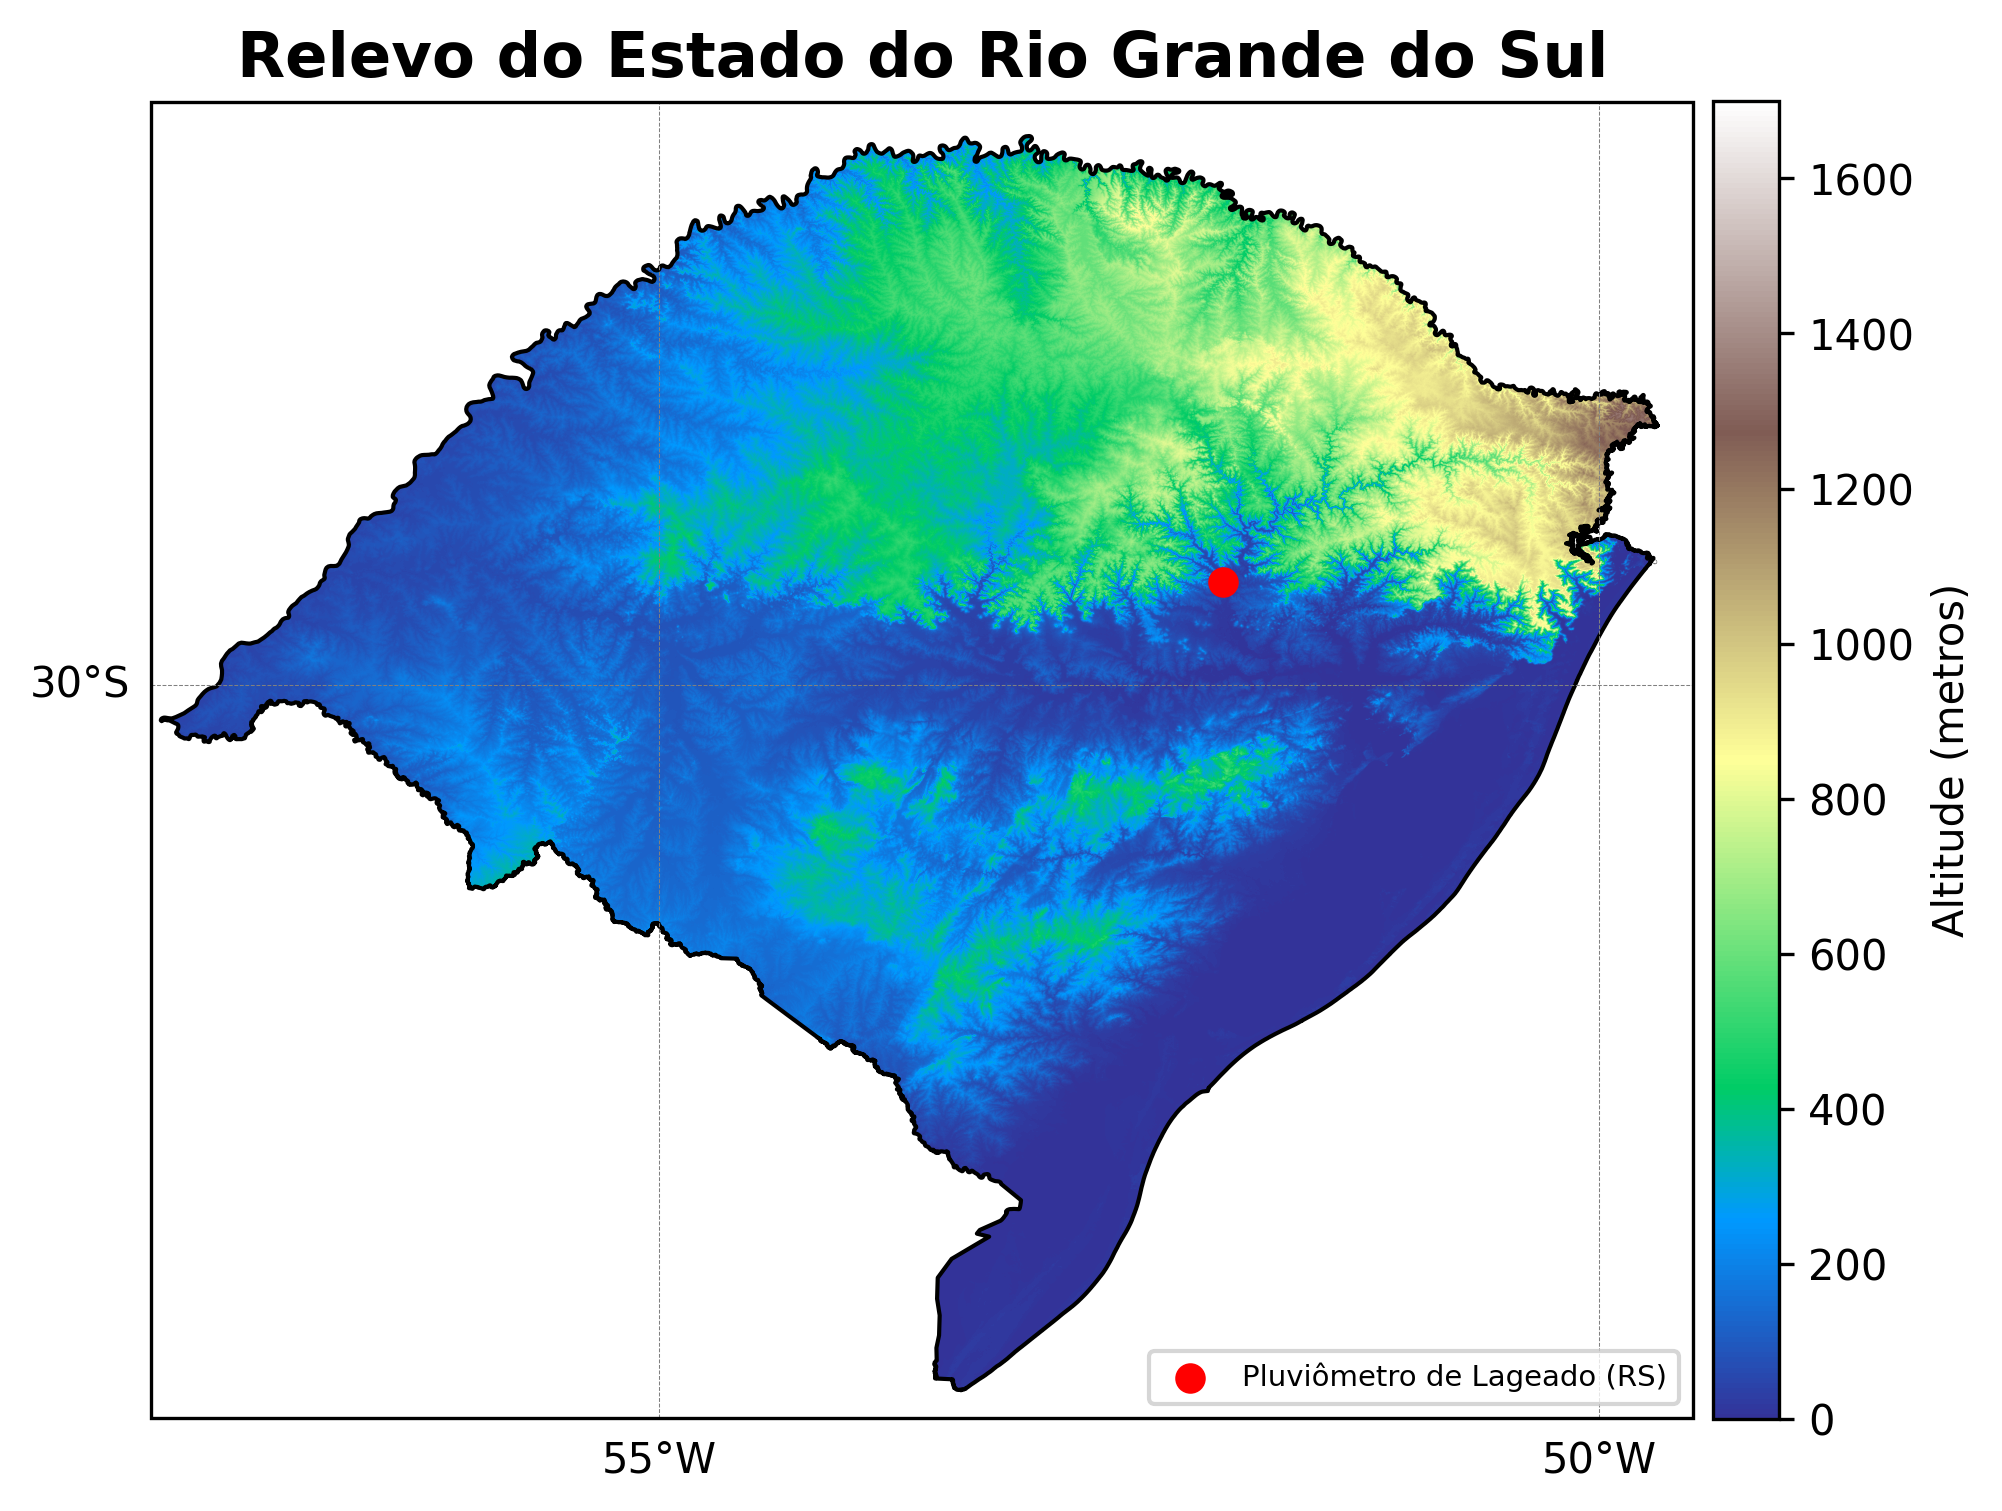

**Exemplo 2:** Precipitação por dia

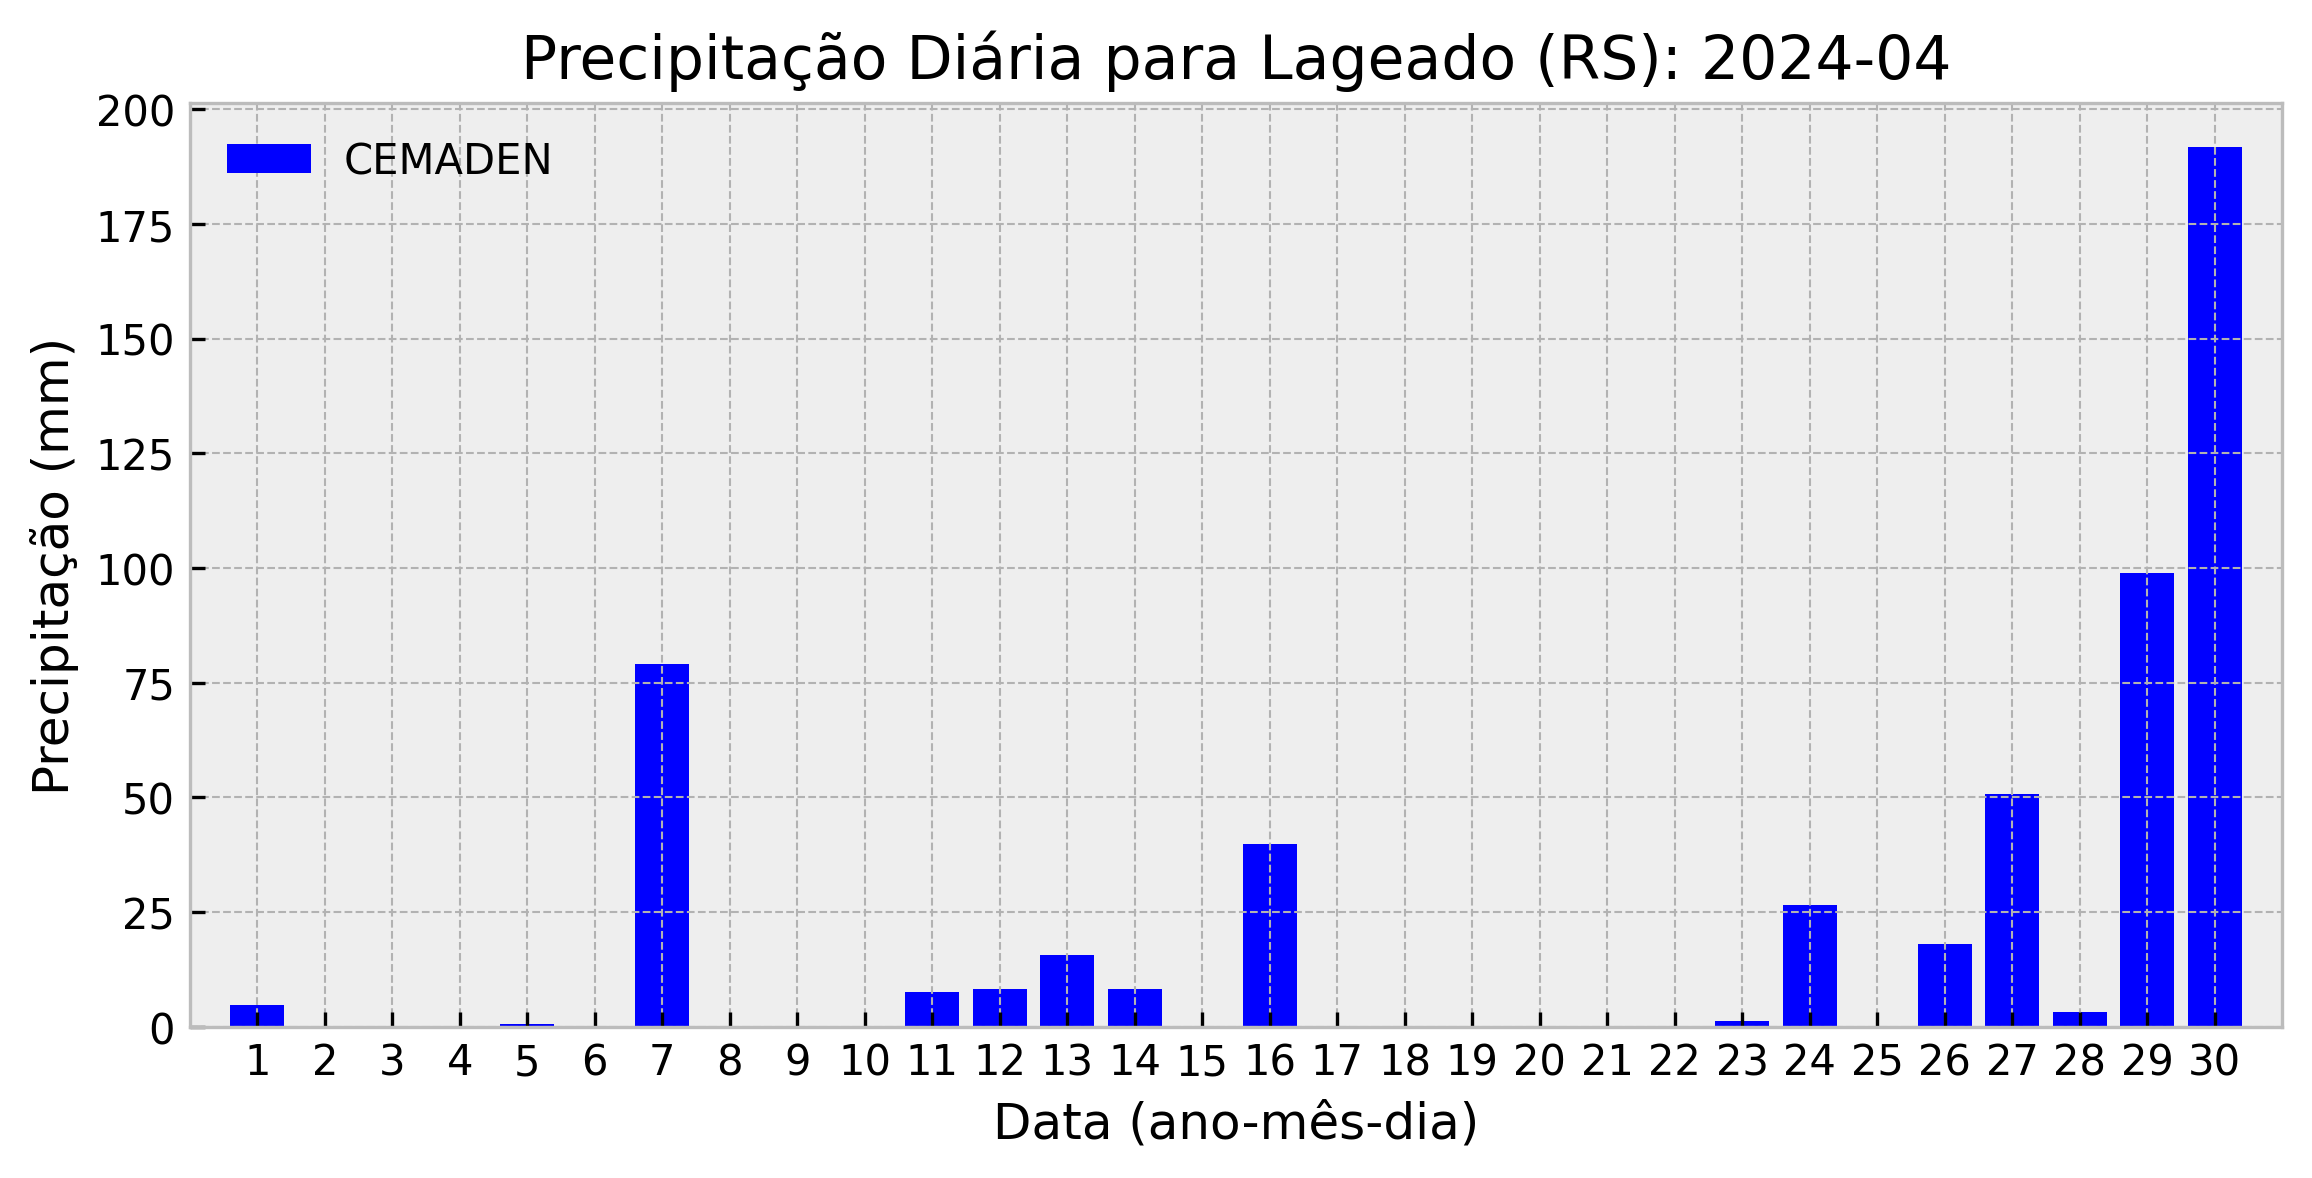

**Exemplo 3:** Precipitação por hora

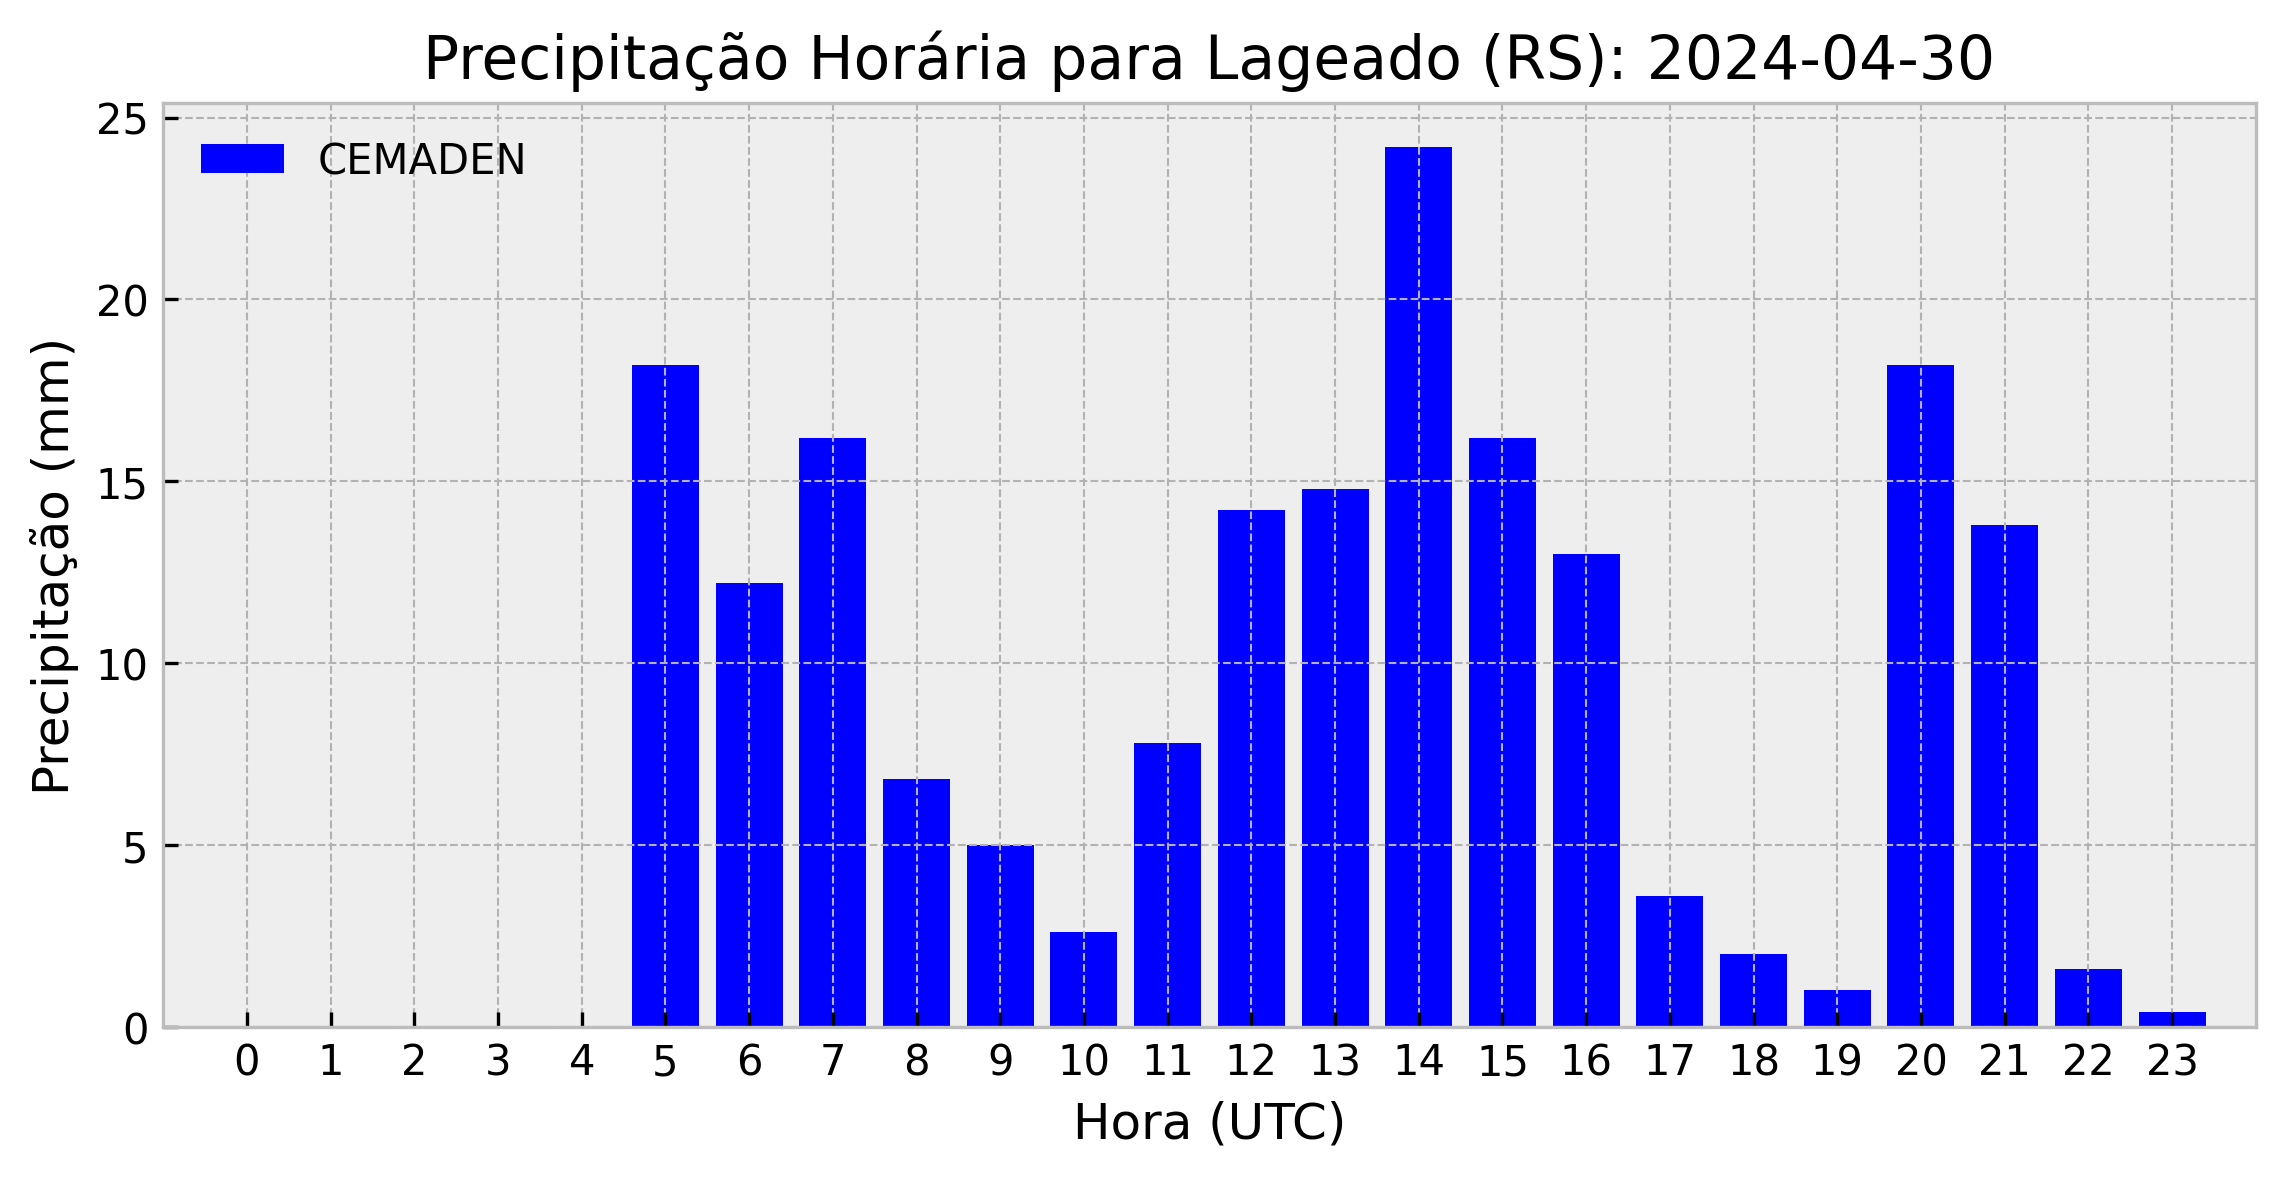

# **1° Passo:** Instalando bibliotecas

Algumas bibliotecas não vem por portão instaladas no Google Colab. Assim intalaremos as seguintes bibliotecas:

 - [cartopy](https://scitools.org.uk/cartopy/docs/latest/): biblioteca para plotar mapas.

 - [salem](https://salem.readthedocs.io/en/stable/): biblioteca para mascarar uma região.

 - [topography](https://pypi.org/project/bmi-topography/): biblioteca com o dado de topografia.

Para instalarmos uma biblioteca no Google Colab digitamos o comando `!pip install -q` e o nome da bilioteca. Por exemplo, se quisermos instalar a biblioteca cartopy: `!pip install -q catopy`. A instalação de todas bibliotecas levará apenas 45 segundos, é super rápido!

In [1]:
# instalando a biblioteca cartopy
!pip install -q cartopy

# instalando a biblioteca Salem
!pip install -q rasterio pyproj geopandas salem descartes

# instalando a biblioteca de topografia
!pip install -q bmi-topography

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.7 MB/s eta 0:00:00


# **2° Passo:** Importando bibliotecas

Nesta etapa importaremos todas as bibliotecas necessárias para a nossa atividade prática.

In [2]:
import pandas as pd                        # biblioteca para trabalhar com planilhas excel
import matplotlib.pyplot as plt            # biblioteca para gerar gráficos
import numpy as np                         # biblioteca para trabalhar com matrizes
import cartopy, cartopy.crs as ccrs        # biblioteca para plotar mapas
import cartopy.io.shapereader as shpreader # biblioteca para ler arquivo do contorno de uma região
from bmi_topography import Topography      # biblioteca para topografia
import salem                               # biblioteca para mascar uma região
import time                                # biblioteca que conta o tempo de processamento

import warnings                            # biblioteca para ignorar os avisos
warnings.filterwarnings("ignore")

# **3° Passo:** Baixando os dados das estações do CEMADEN

* Nesta etapa nós baixaremos os dados de precipitação da estação pluviométrica do CEMADEN localizada na cidade de **Lageado** no Estado do Rio Grande do Sul (RS).

- Para isto, primeiramente você deverá acessar o [site](http://www2.cemaden.gov.br/mapainterativo/#) do CEMADEN e clicar na aba `Download de Dados`.

- Em seguida clicar em `Estações Pluviométricas`, como indicado na imagem a seguir:

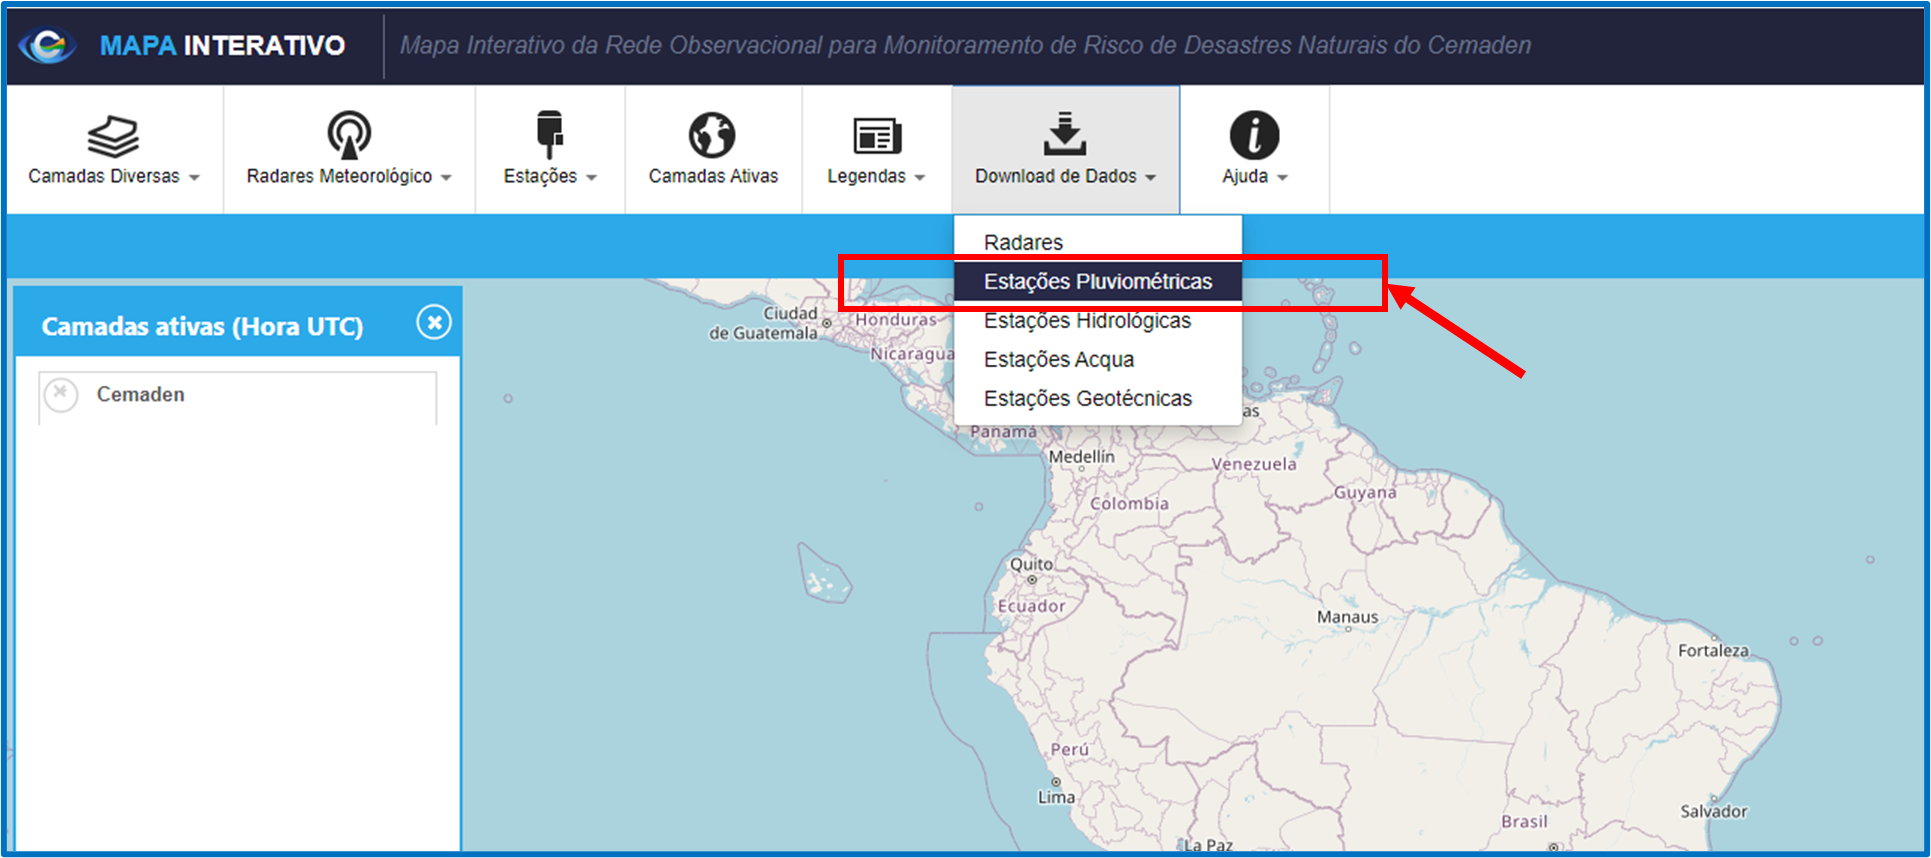

- Abrirá uma página para escolhermos qual estação do CEMADEN utilizaremos. Você deverá realizar as seguintes escolhas:
    1. **UF**: escolha a sigla `RS`.
    2. **Município**: escolha `LAJEADO`.
    3. **Mês**: escolha `Abril`.
    4. **Ano**: escolha `2024`.
    5. **Confirmação de segurança**: digite o texto que aparecerá na sua tela. **Observação**: o texto da imagem de vocês será diferente daquele mostrado na figura abaixo.


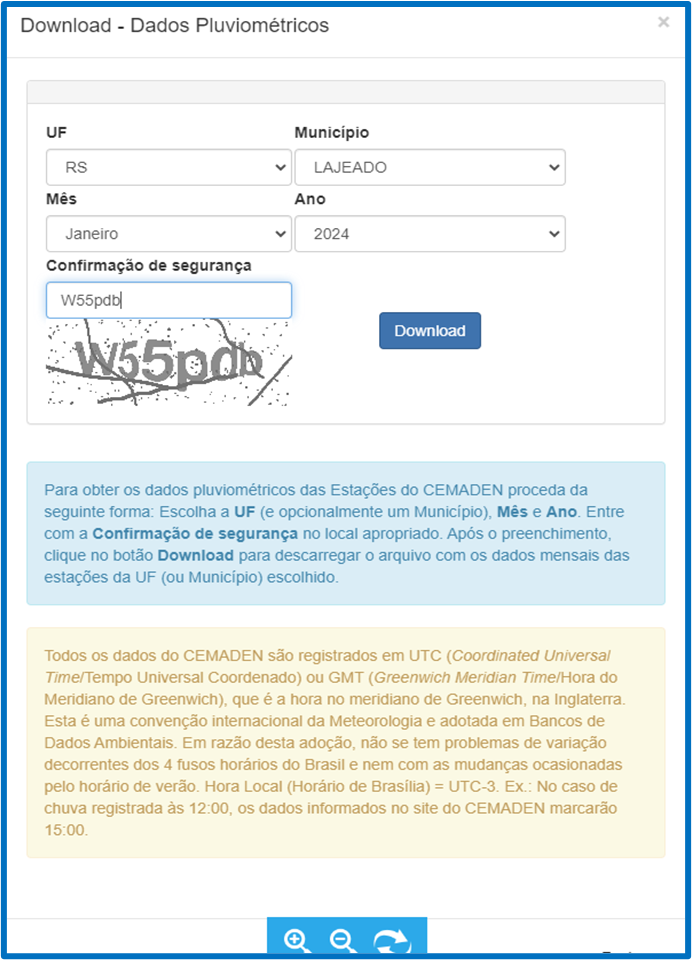

- Agora você deverá clicar no botão `Download`. Veja que uma planilha com o nome `data.csv` será baixada para a pasta *Download* do seu computador.

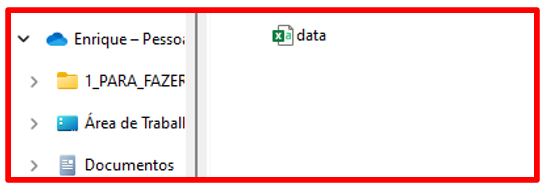

- Após esse passo, você deverá fazer o upload do arquivo para a sua sessão do Google Colab.

- Para isto você deverá clicar no símbolo de uma pasta que esta escrita `arquivos`, e esta localizada no lado esquerdo da sua tela do Google Colab, como indicado na imagem a seguir:





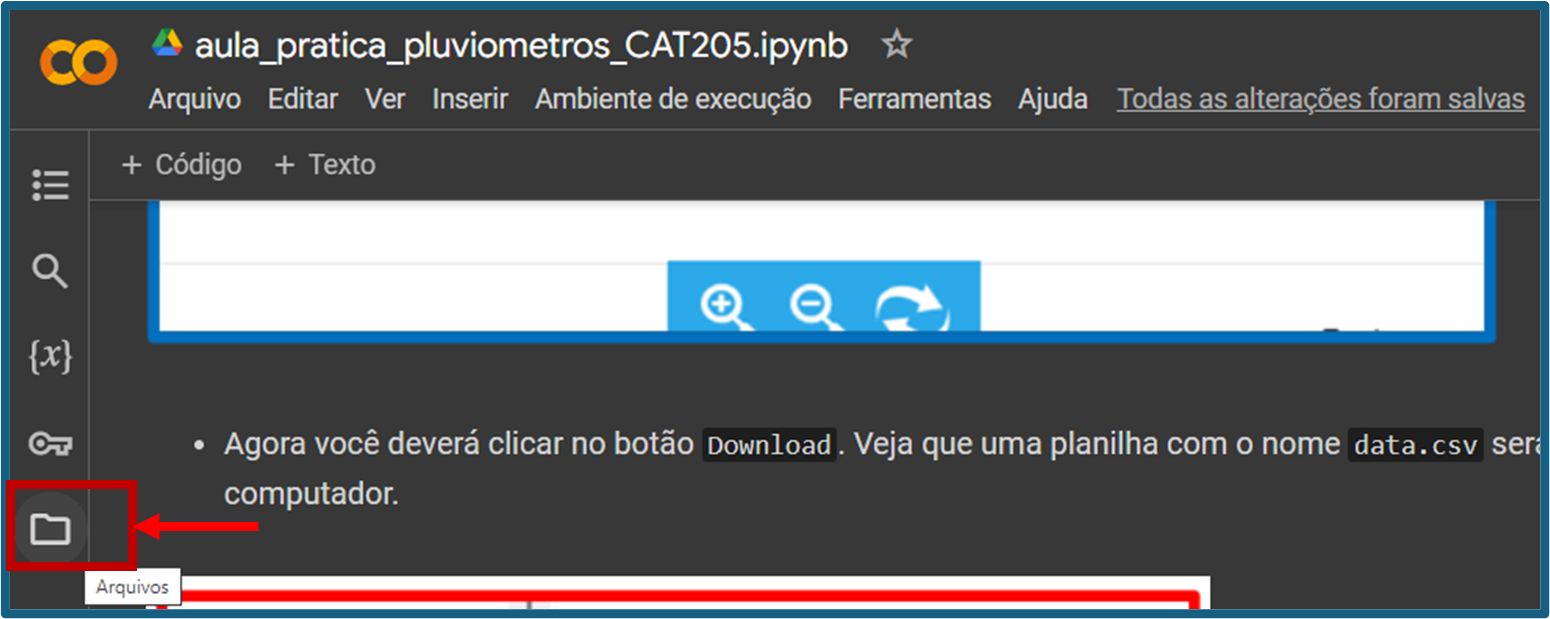

- Em seguida você deverá clicar na seta localizada na parte esquerda da sua tela do Colab, onde aparecerá a mensagem `Fazer upload para o armazenamento da sessão`.

- Em seguida escolher o arquivo que tem o nome `data.csv`, aquele mesmo arquivo que foi baixado na pasta downloads do seu computador. Aparecerá um aviso, basta clicar em `ok`. Veja o exemplo na imagem a seguir:

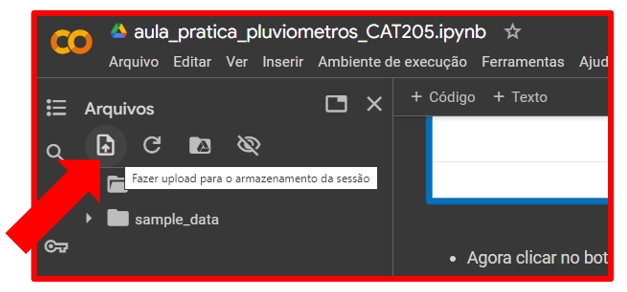

- Depois de fazer o upload do arquivo, veja que o arquivo ficará armazenado no `/content`, como indicado na imagem a seguir.

- Lembre-se que o  `/content` é a memória momentânea da sua sessão do Colab. O que significa que assim que você fechar a sua sessão do Colab, o arquivo será excluído dessa sessão automaticamente.   

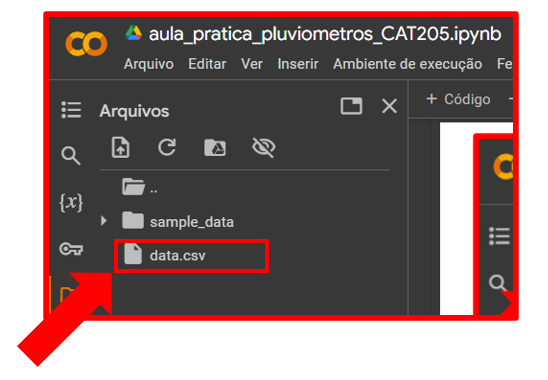

- Uma explicação detalhada de como baixar os dados do CEMADEN encontra-se clicando [aqui](https://github.com/evmpython/aula_pratica_pluviometros_CAT205/blob/main/docs/download_estacoes_CEMADEN.pdf) e as informações sobre os pluviômetros encontram-se [aqui](http://www2.cemaden.gov.br/pluviometros-automatico/)

- Agora que já estamos com o dado da estação pluviômétrica, vamos começar a trabalhar com os dados que foram baixados. Agora começa a parte interessante da aula prática!!!

# **PARTE 1):** `Conhecendo` os dados da estação pluviométrica

* O primeiro passo será lermos a tabela (`data.csv`) que contem os dados de precipitação que baixamos do site do CEMADEN. Para isto, utilizaremos a biblioteca [pandas](https://pandas.pydata.org/https://pandas.pydata.org/). Essa biblioteca serve para ler dados em formato de planilha, com são os arquivos excel e CSV. Para isto usaremos o comando [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) da biblioteca pandas.


- Nesse comando precisamos informar os seguintes parâmetros:
 1. nome do arquivo, nesse caso `data.csv`
 2. separador das colunas, nesse caso `;`
 3. separador das casas decimais, nesse caso `,`


* Vejam como é simples. Com apenas **1 linha** fizemos a leitura do arquivo da estação pluviométrica. Essa é a **Mágica e Facilidade do Python** :)

In [83]:
%%time
# leitura da planilha
tabela = pd.read_csv('data.csv', delimiter=';', decimal=',')

CPU times: user 9.4 ms, sys: 85 µs, total: 9.48 ms
Wall time: 13.2 ms


In [84]:
# mostrando os dados contidos na planilha
tabela

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 00:20:00.0,0.0
1,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 01:20:00.0,0.0
2,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 02:20:00.0,0.0
3,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 03:20:00.0,0.0
4,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 04:20:00.0,0.0
...,...,...,...,...,...,...,...,...
953,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 21:50:00.0,7.4
954,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:00:00.0,0.8
955,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:10:00.0,0.4
956,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:20:00.0,0.0


Como podemos ver, a variável que chamamos de `tabela` tem uma série de colunas com informações importantes. São elas:

* `municipio`: cidade na qual a estação pluviométrica esta instalada.

* `codEstacao`: código da estação pluviométrica.

* `uf`: sigla do Estado no qual a estação pluviométrica esta instalada.

* `latitude` e `longitude`: latitude e longitude da localização da estação pluviométrica.

* `datahora`: data e hora da medição de precipitação no formato: *ano-mês-dia hora:minuto:segundos*.

* `valorMedida`: valor da precipitação medida em milímetros. Quando não há precipitação a frequência temporal da medição é de 1 hora e quando há precipitação é a cada 10 min.

Visualizando as primeiras 5 linhas da tabela: comando `head()`

In [85]:
tabela.head()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 00:20:00.0,0.0
1,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 01:20:00.0,0.0
2,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 02:20:00.0,0.0
3,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 03:20:00.0,0.0
4,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 04:20:00.0,0.0


Visualizando as últimas 5 linhas da tabela: comando `tail()`

In [86]:
tabela.tail()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
953,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 21:50:00.0,7.4
954,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:00:00.0,0.8
955,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:10:00.0,0.4
956,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:20:00.0,0.0
957,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 23:20:00.0,0.0


Mostrando o tipo das variáveis da tabela. Exemplo: inteiro, real e objeto: comando `info()`. Nesse exemplo as colunas: `municipio`, `codEstacao`, `uf`, `nomeEstacao` e `datahora` estão no formato **objeto**, que seria um formato de nome. Já a coluna `latitude` e `longitude` estão no formato de números reais (**float**).

In [87]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   municipio    958 non-null    object 
 1   codEstacao   958 non-null    object 
 2   uf           958 non-null    object 
 3   nomeEstacao  958 non-null    object 
 4   latitude     958 non-null    float64
 5   longitude    958 non-null    float64
 6   datahora     958 non-null    object 
 7   valorMedida  958 non-null    float64
dtypes: float64(3), object(5)
memory usage: 60.0+ KB


Acessando as informações de uma coluna específica. Nesse caso queremos acessar os valores da coluna `nomeEstacao`. Então basta colocarmos entre *colchetes*  o nome da coluna.

In [88]:
tabela['nomeEstacao']

,nomeEstacao
0,Centro
1,Centro
2,Centro
3,Centro
4,Centro
...,...
953,Centro
954,Centro
955,Centro
956,Centro


Quantidade de informações únicas de uma coluna. Nesse caso queremos saber quais são os valores únicos contidos na coluna *nomeEstacao*. Para isto usamos o comando **unique**. Ao processar essa célula de código, obtemos que a coluna *nomeEstacao* possui as seguintes estações:
 1. `Santo Antonio`
 2. `Centro`
 3. `Moinhos D´Agua`

In [89]:
tabela['nomeEstacao'].unique()

array(['Centro'], dtype=object)

Selecionando os valores da estação `Moinhos D´Agua`. Observe que foi mostrado para cada linha da tabela, as seguintes respostas:
1. `False`: quando **não** é a estação Moinhos D´Agua'
2. `True`: quando naquela linha **temos** a estação Moinhos D´Agua

In [90]:
tabela['nomeEstacao'] == 'Centro'

,nomeEstacao
0,True
1,True
2,True
3,True
4,True
...,...
953,True
954,True
955,True
956,True


In [91]:
condicao = tabela['nomeEstacao'] == 'Centro'

Agora vamos aplicar a condição na nossa tabela. Observe que agora foi mostrado apenas as linhas que contem a estação `Moinhos D´Agua`.

In [92]:
tabela[condicao]

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 00:20:00.0,0.0
1,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 01:20:00.0,0.0
2,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 02:20:00.0,0.0
3,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 03:20:00.0,0.0
4,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 04:20:00.0,0.0
...,...,...,...,...,...,...,...,...
953,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 21:50:00.0,7.4
954,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:00:00.0,0.8
955,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:10:00.0,0.4
956,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:20:00.0,0.0


Iremos criar uma nova tabela, contendo apenas as informações da estação Moinhos D´Agua e chamaremos de `tabela_moinhosdagua`.

In [93]:
tabela_moinhosdagua = tabela[condicao]
tabela_moinhosdagua

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 00:20:00.0,0.0
1,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 01:20:00.0,0.0
2,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 02:20:00.0,0.0
3,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 03:20:00.0,0.0
4,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 04:20:00.0,0.0
...,...,...,...,...,...,...,...,...
953,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 21:50:00.0,7.4
954,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:00:00.0,0.8
955,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:10:00.0,0.4
956,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:20:00.0,0.0


Somando os valores da coluna `valorMedida`. Iremos utilizar o método `sum`. Será mostrado a soma da precipitação da coluna inteira. Nesse caso o mês de abril de 2024 apresentou um total de `555,4 mm` de precipitação.

In [94]:
tabela_moinhosdagua['valorMedida'].sum()

393.0

Agora que já compreendemos como são os dados das estações pluviométricas do CEMADEN, iremos produzir alguns gráficos utilizando esses dados.

# **PARTE 2):** Mapa com a `localização da estação pluviométrica`

Nesse momento torna-se importante vocês saberem em qual parte do Estado do RS esta localizada a estação de `Moinhos D´Agua`. Para isto iremos plotar um mapa com o relevo do Estado do RS e a localização da estação.

In [95]:
# verificando a tabela na qual usaremos os dados
tabela_moinhosdagua.head()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 00:20:00.0,0.0
1,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 01:20:00.0,0.0
2,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 02:20:00.0,0.0
3,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 03:20:00.0,0.0
4,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 04:20:00.0,0.0


Vamos selecionar a `latitude` e `longitude` da estação. Estas informações estão nas colunas `4`e `5`, respectivamente. `LEMBRETE`: o python começa o contador a partir do índice `0`.  

In [96]:
tabela_moinhosdagua.iloc[0, 4]

-28.98485

In [97]:
tabela_moinhosdagua.iloc[0, 5]

-52.34445

In [98]:
# salvando a LATITUDE da estação
lat_moinhosdagua = tabela_moinhosdagua.iloc[0, 4]

# salvando a LONGITUDE da estação
lon_moinhosdagua = tabela_moinhosdagua.iloc[0, 5]

# mostrando na tela o valor da latitude e longitude da estação
print(lat_moinhosdagua, lon_moinhosdagua)

-28.98485 -52.34445


- Para plotar o mapa de relevo utilizaremos a biblioteca [bmi-topography](https://bmi-topography.readthedocs.io/en/latest/). Esta biblioteca fornece uma maneira rápida de acesso aos dados de relevo global fornecidos pela   [OpenTopography](https://opentopography.org/).

CPU times: user 13.7 s, sys: 2.64 s, total: 16.3 s
Wall time: 16.7 s


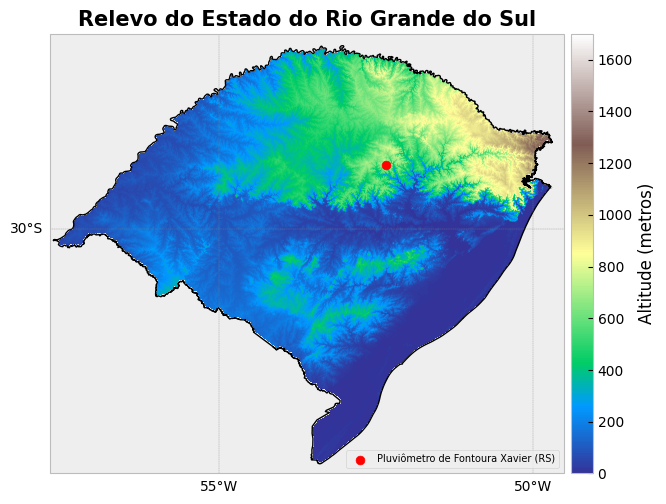

In [99]:
%%time
# tamanho da figura
plt.figure(figsize=(7,7))

# define a projeção do mapa
ax = plt.axes(projection=ccrs.PlateCarree())

# define os limites de latitudes e longitudes da figura
lonmin, lonmax, latmin, latmax = -57.7, -49.5, -33.9, -26.9

# leitura do dado de relevo
topo = Topography(dem_type="SRTMGL3",
                  south=latmin,
                  north=latmax,
                  west=lonmin,
                  east=lonmax,
                  output_format="GTiff",
                  cache_dir=".")
relevo = topo.load()

# leitura do contorno do RS
contorno_RS = salem.read_shapefile('https://github.com/evmpython/aula_pratica_pluviometros_CAT205/raw/main/shapefiles/RS_UF_2019.shp')

# plota mapa de relevo
img = ax.imshow(relevo[0,:,:].salem.roi(shape=contorno_RS),
                cmap='terrain',
                vmin=0, vmax=1700,
                extent=[lonmin, lonmax, latmin, latmax])

# plota localização da estação pluviométrica de Lageado
plt.scatter(lon_moinhosdagua, lat_moinhosdagua,
            transform=ccrs.PlateCarree(),
            marker='o', s=40, color='red', zorder=2,
            label=f'Pluviômetro de Fontoura Xavier (RS)')

# adiciona as linhas de grades
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# plota contorno do Estado do RS
shapefile = list(shpreader.Reader('https://github.com/evmpython/aula_pratica_pluviometros_CAT205/raw/main/shapefiles/RS_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1.0)

# adiciona a barra de cores
plt.colorbar(img, label='Altitude (metros)', orientation='vertical', pad=0.012, fraction=0.0405)

# adiciona a legenda
ax.legend(loc='lower right', ncols=1, frameon=True, fontsize=7)

# adiciona o título
plt.title(f'Relevo do Estado do Rio Grande do Sul', fontweight='bold', fontsize=15, loc='center')

# salva a figura
plt.savefig('Figura_1_mapa_localizacao_da_estacao.png', bbox_inches='tight', dpi=300)

# **PARTE 3):** Gráfico da quantidade de precipitação `por dia`

Nessa etapa queremos analisar a quantidade de precipitação que ocorreu em cada `dia do mês` de abril de 2024 para a estação de Moinhos D´Agua.

In [100]:
# mostrando os dados que iremos utilizar
tabela_moinhosdagua.head()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 00:20:00.0,0.0
1,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 01:20:00.0,0.0
2,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 02:20:00.0,0.0
3,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 03:20:00.0,0.0
4,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 04:20:00.0,0.0


Veja que a coluna `datahora` esta no formato `objeto` (ou seja, no formato de um nome). Quando queremos saber como uma variável muda ao longo do tempo, precisamos transformar a data para o formato de `datas`, ou em inglês chamado de formato `datetime`.

In [101]:
tabela_moinhosdagua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   municipio    958 non-null    object 
 1   codEstacao   958 non-null    object 
 2   uf           958 non-null    object 
 3   nomeEstacao  958 non-null    object 
 4   latitude     958 non-null    float64
 5   longitude    958 non-null    float64
 6   datahora     958 non-null    object 
 7   valorMedida  958 non-null    float64
dtypes: float64(3), object(5)
memory usage: 60.0+ KB


In [102]:
# insere a coluna data como "DateTime" na tabela
tabela_moinhosdagua['datahora'] = pd.to_datetime(tabela_moinhosdagua['datahora'])
tabela_moinhosdagua

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 00:20:00,0.0
1,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 01:20:00,0.0
2,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 02:20:00,0.0
3,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 03:20:00,0.0
4,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-01 04:20:00,0.0
...,...,...,...,...,...,...,...,...
953,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 21:50:00,7.4
954,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:00:00,0.8
955,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:10:00,0.4
956,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,2024-04-30 22:20:00,0.0


Veja que agora, o formato da coluna **datahora** é `datetime64[ns]`, ou seja, formato de data.

In [103]:
tabela_moinhosdagua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   municipio    958 non-null    object        
 1   codEstacao   958 non-null    object        
 2   uf           958 non-null    object        
 3   nomeEstacao  958 non-null    object        
 4   latitude     958 non-null    float64       
 5   longitude    958 non-null    float64       
 6   datahora     958 non-null    datetime64[ns]
 7   valorMedida  958 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 60.0+ KB


O próximo passo será transformar a coluna data, no índice da nossa tabela. Faremos isso, para podermos escolher um período de dados específico da nossa tabela.

Para isso utilizaremos a função `set_index`do pandas e precisaremos indicar qual coluna será o índice, no nosso caso será a coluna `datahora`. Veja que após esse processamento, a coluna `datahora` ficou em negrito.

In [104]:
# seta a coluna data com o index do dataframe
tabela_moinhosdagua.set_index('datahora', inplace=True)
tabela_moinhosdagua

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,valorMedida
datahora,,,,,,,
2024-04-01 00:20:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.0
2024-04-01 01:20:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.0
2024-04-01 02:20:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.0
2024-04-01 03:20:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.0
2024-04-01 04:20:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.0
...,...,...,...,...,...,...,...
2024-04-30 21:50:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,7.4
2024-04-30 22:00:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.8
2024-04-30 22:10:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.4


Os dados da tabela estão a cada 10 min ou a cada 1 hora. No entanto, queremos somar a precipitação que ocorreu em cada dia do mês de Abril.

Para isto, usaremos o comando [resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) da biblioteca pandas. Como argumento,  indicaremos que iremos reamostrar nossos dados a cada `1 dia` e que queremos `somar esses dados dentro de cada dia`.

Lembrando que a precipitação acumulada do dia 1, representa a soma da precipitação que ocorreu entre às 0 horas e 0 minutos até às 23 horas e 59 minutos daquele dia.

In [105]:
# agrupa os dados
tabela_moinhosdagua_dia = tabela_moinhosdagua.resample('1D').sum()['valorMedida']

Veja que para cada dia do mês de abril foi somado a precipitação. Então esse valor representa o total de precipitação para cada dia daquele mês (ou seja, em `mm/dia`)

In [106]:
# mostra os dados
tabela_moinhosdagua_dia

,valorMedida
datahora,
2024-04-01,1.2
2024-04-02,0.2
2024-04-03,0.0
2024-04-04,1.2
2024-04-05,0.4
2024-04-06,0.0
2024-04-07,29.8
2024-04-08,0.2
2024-04-09,0.0


In [107]:
tabela_moinhosdagua_dia.values

array([  1.2,   0.2,   0. ,   1.2,   0.4,   0. ,  29.8,   0.2,   0. ,
         0.2,   4.2,   1.8,  38.8,  10.8,   0.8,  34.6,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   1.8,   0.4,   0. ,   9.8,   8.8,
        12.6,  79.6, 155.8])

Agora iremos plotar nosso gráfico da `precipitação por dia`.

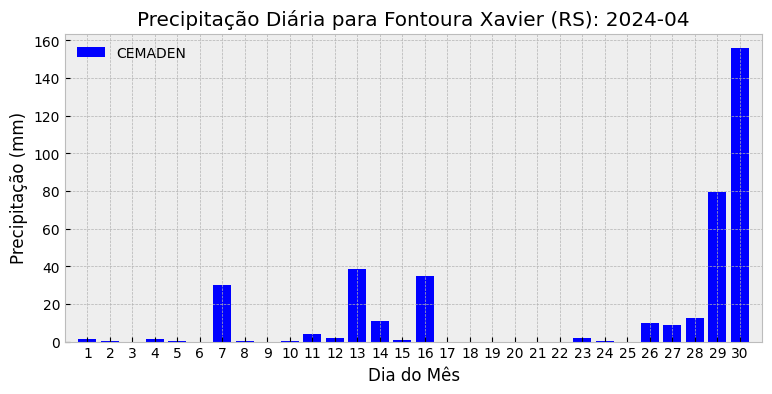

CPU times: user 1.33 s, sys: 249 ms, total: 1.58 s
Wall time: 1.41 s


In [108]:
%%time
# tamanho da figura
fig, ax = plt.subplots(figsize=(9,4))

# layout do gráfico
plt.style.use('bmh')

# plota figura
ax.bar(np.arange(1, 31, 1), tabela_moinhosdagua_dia.values, color='blue', label='CEMADEN')

# configuração dos eixos
ax.set(xlim=(0, 31),
       xlabel='Dia do Mês',
       ylabel='Precipitação (mm)',
       title='Precipitação Diária para Fontoura Xavier (RS): 2024-04',
       xticks=np.arange(1, 31, 1),
       xticklabels=[str(i) for i in np.arange(1, 31, 1)])

# adiciona legenda
ax.legend(loc='upper left', frameon=False)

# salva figura
plt.savefig('Figura_2_precipitacao_por_dia.png', bbox_inches='tight', dpi=300)

# mostra na tela a figura
plt.show()

# **PARTE 4):** Gráfico da quantidade de precipitação `por hora`

Nessa etapa queremos analisar a quantidade de precipitação que ocorreu em cada `hora do dia 30 de abril` de 2024 para a estação de Moinhos D´Agua. Escolhemos esse dia porque ele foi o dia que registrou a maior quantidade de precipitação do mês de Abril.

In [109]:
# quantidade de precipitação por dia
tabela_moinhosdagua_dia

,valorMedida
datahora,
2024-04-01,1.2
2024-04-02,0.2
2024-04-03,0.0
2024-04-04,1.2
2024-04-05,0.4
2024-04-06,0.0
2024-04-07,29.8
2024-04-08,0.2
2024-04-09,0.0


In [110]:
# mostrando os dados que iremos utilizar
tabela_moinhosdagua

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,valorMedida
datahora,,,,,,,
2024-04-01 00:20:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.0
2024-04-01 01:20:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.0
2024-04-01 02:20:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.0
2024-04-01 03:20:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.0
2024-04-01 04:20:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.0
...,...,...,...,...,...,...,...
2024-04-30 21:50:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,7.4
2024-04-30 22:00:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.8
2024-04-30 22:10:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.4


Usando a nossa tabela `tabela_moinhosdagua` queremos selecionar apenas os dados do dia 30 de abril. Para isto basta utilizarmos o comando `loc`e colocarmos entre *colchetes*  a data que desejamos, nesse caso a data é `2024-04-30`.

In [111]:
tabela_moinhosdagua.loc['2024-04-30']

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,valorMedida
datahora,,,,,,,
2024-04-30 00:20:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.2
2024-04-30 00:40:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.6
2024-04-30 00:50:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,1.0
2024-04-30 01:00:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,1.6
2024-04-30 01:20:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.0
...,...,...,...,...,...,...,...
2024-04-30 21:50:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,7.4
2024-04-30 22:00:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.8
2024-04-30 22:10:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.4


Vamos colocar os dados do dia **30 de abril** na variável chamada `tabela_moinhosdagua_30abril`. Veja que nessa tabela só temos os dados da cidade de `Lageado` da estação chamada `Moinhos D´Agua` para o dia `30 de abril de 2024`.

In [112]:
tabela_moinhosdagua_30abril = tabela_moinhosdagua.loc['2024-04-30']
tabela_moinhosdagua_30abril

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,valorMedida
datahora,,,,,,,
2024-04-30 00:20:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.2
2024-04-30 00:40:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.6
2024-04-30 00:50:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,1.0
2024-04-30 01:00:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,1.6
2024-04-30 01:20:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.0
...,...,...,...,...,...,...,...
2024-04-30 21:50:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,7.4
2024-04-30 22:00:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.8
2024-04-30 22:10:00,FONTOURA XAVIER,430830001A,RS,Centro,-28.98485,-52.34445,0.4


De forma semelhante ao realizado para os dados diários, iremos realizar a soma da precipitação para cada hora do dia 30 de abril.

Nesse caso, queremos saber o acumulado de precipitação que ocorreu para cada hora, isto é, às 0, 1, 2,... 23 horas UTC.

Por exemplo: a precipitação acumulada às 00 UTC, é realizada somando a precipitação que ocorreu entre às 0 horas e 0 minutos até às 0 horas e 59 minutos. Para isso iremos utilizar a função `resample` e indicar que a frequência da soma da precipitação será por hora, indicando `1H`.

In [113]:
# agrupa os dados por HORA
tabela_moinhosdagua_30abril_hora = tabela_moinhosdagua_30abril.resample('1H').sum()['valorMedida']
tabela_moinhosdagua_30abril_hora

,valorMedida
datahora,
2024-04-30 00:00:00,1.8
2024-04-30 01:00:00,1.6
2024-04-30 02:00:00,0.0
2024-04-30 03:00:00,0.0
2024-04-30 04:00:00,0.0
2024-04-30 05:00:00,0.0
2024-04-30 06:00:00,2.6
2024-04-30 07:00:00,0.2
2024-04-30 08:00:00,36.0


Agora iremos plotar nosso gráfico da precipitação por hora.

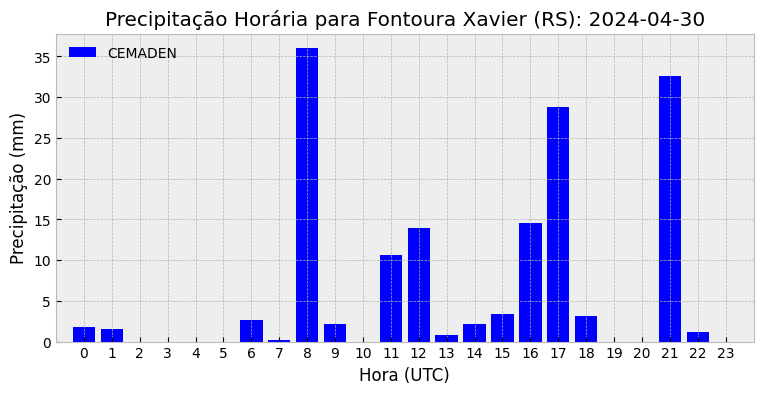

CPU times: user 1.23 s, sys: 181 ms, total: 1.41 s
Wall time: 1.35 s


In [114]:
%%time
# tamanho da figura
fig, ax = plt.subplots(figsize=(9,4))

# layout do gráfico
plt.style.use('bmh')

# plota figura
ax.bar(np.arange(0, 24, 1), tabela_moinhosdagua_30abril_hora.values, color='blue', label='CEMADEN')

# configuração dos eixos
ax.set(xlim=(-1, 24),
       xlabel='Hora (UTC)',
       ylabel='Precipitação (mm)',
       title='Precipitação Horária para Fontoura Xavier (RS): 2024-04-30',
       xticks=np.arange(0, 24, 1),
       xticklabels=[str(i) for i in np.arange(0, 24, 1)])

# adiciona legenda
ax.legend(loc='upper left', frameon=False)

# salva figura
plt.savefig('Figura_3_precipitacao_por_hora.png', bbox_inches='tight', dpi=300)

# mostra na tela a figura
plt.show()